In [174]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

##  Load and Prepare the Data

**Tips** dataset from the Seaborn library to predict the `tip` based on the `total_bill`.  

### Load dataset

In [175]:
tips = sns.load_dataset("tips")
X = tips[["total_bill"]].values
y = tips["tip"].values

### Apply Feature normalization

In [176]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Building the Linear Regression Model 📈

1. **Initialize** weights (`w`) and bias (`b`) to zero.  
2. 🔁 **Repeat for a number of iterations**:
   - **Predict**: `y_pred = X · w + b`
   - **Calculate error**: Difference between predicted and actual `y`
   - **Compute gradients** for `w` and `b`
   - 🛠️ **Update parameters**:
     - `w = w - learning_rate × dw`
     - `b = b - learning_rate × db`
3. **After training**, use the learned `w` and `b` to make predictions.


In [177]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.0005, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None

    def compute_gradient(self, x, y):
        m = x.shape[0]
        y_pred = x.dot(self.w) + self.b
        err = y_pred - y
        dw = (1/m) * x.T.dot(err)
        db = np.sum(err) / m
        return dw, db

    def gradient_descent(self, x, y):
        m, n = x.shape
        self.w = np.zeros(n)
        self.b = 0.0

        for i in range(self.iterations):
            dw, db = self.compute_gradient(x, y)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict(self, X):
        return X.dot(self.w) + self.b

## 🏋️‍♂️ Train The Models

### Train custom model

In [178]:
custom_model = CustomLinearRegression()
custom_model.fit(X_scaled, y)
y_pred_custom = custom_model.predict(X_scaled)

### Train sklearn model

In [179]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_scaled, y)
y_pred_sklearn = sklearn_model.predict(X_scaled)

## 📐 Compare the Models

### Compare predictions

In [180]:
mse = mean_squared_error(y_pred_custom, y_pred_sklearn)
print(f"Mean Squared Error between custom and sklearn: {mse:.6f}")

Mean Squared Error between custom and sklearn: 0.000447


### Visualize the Predictions

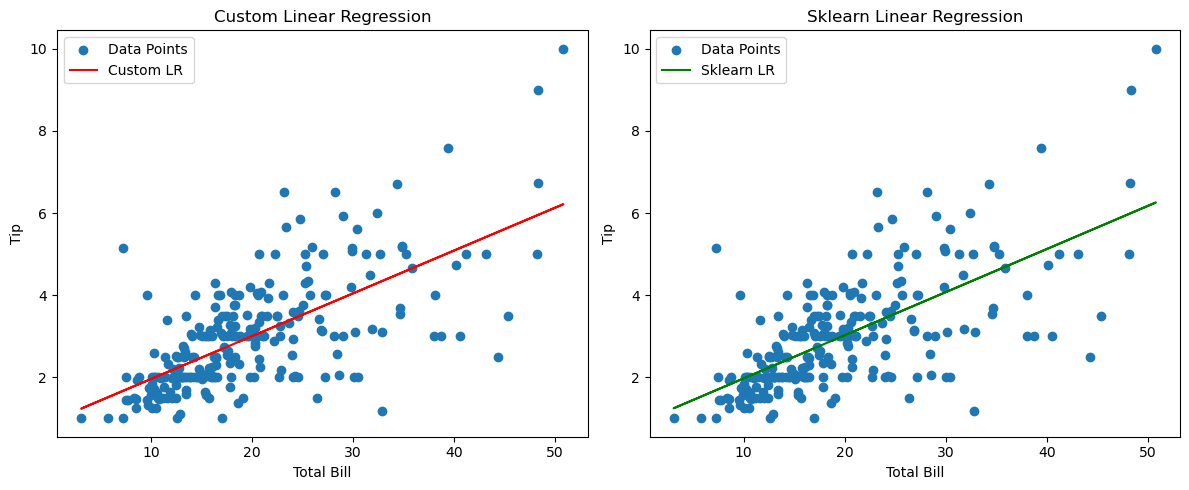

In [181]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred_custom, "r-", label="Custom LR")
plt.title("Custom Linear Regression")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred_sklearn, "g-", label="Sklearn LR")
plt.title("Sklearn Linear Regression")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()

plt.tight_layout()
plt.show()


### 🔍 Final Weights and Bias

In [182]:
print("Custom Model w:", custom_model.w[0], "b:", custom_model.b)
print("Sklearn Model w:", sklearn_model.coef_[0], "b:", sklearn_model.intercept_)

Custom Model w: 0.9267746172056758 b: 2.9781016910702474
Sklearn Model w: 0.9330536268003372 b: 2.99827868852459
